In [ ]:
#Name :Nalawade Prafulla Chandrashekhar.
#class: B.E.A.I & D.S.
#Roll No:42
#Subject : Deep Learning (CL-IV)

In [ ]:
# Problem Statement : In this practical, we design and implement a CNN model for image classification using a suitable
# dataset (e.g., medical imaging, agriculture, or CIFAR-10). The model is optimized by adjusting
# hyperparameters such as learning rate, filter size, number of layers, optimizers, and dropout rates to
# improve performance.

In [1]:
#Step 1: Import Required Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
#Step 2: Load and Preprocess the Dataset
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values (scale between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
#Step 3: Define and Optimize the CNN Model
# Hyperparameter tuning
learning_rate = 0.001
dropout_rate = 0.4
filter_size = (3,3)

# Build CNN model
model = Sequential([
    Conv2D(32, filter_size, activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2,2),
    Dropout(dropout_rate),

    Conv2D(64, filter_size, activation='relu'),
    MaxPooling2D(2,2),
    Dropout(dropout_rate),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(dropout_rate),
    Dense(10, activation='softmax')  # 10 classes (CIFAR-10)
])

# Compile the model using Adam optimizer
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
#Step 4: Train the Model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 95ms/step - accuracy: 0.3041 - loss: 1.8840 - val_accuracy: 0.5318 - val_loss: 1.3469
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 82ms/step - accuracy: 0.4990 - loss: 1.4021 - val_accuracy: 0.5816 - val_loss: 1.2178
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.5471 - loss: 1.2759 - val_accuracy: 0.6114 - val_loss: 1.1170
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 87ms/step - accuracy: 0.5720 - loss: 1.2032 - val_accuracy: 0.6470 - val_loss: 1.0390
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 83ms/step - accuracy: 0.5974 - loss: 1.1414 - val_accuracy: 0.6618 - val_loss: 1.0170
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.6044 - loss: 1.1190 - val_accuracy: 0.6472 - val_loss: 1.0089
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 80ms/step - accuracy: 0.6172 - loss: 1.0861 - val_accuracy: 0.6770 - val_loss: 0.9405
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 83ms/step - accuracy: 0.6288 - loss: 1.0567 - 

In [5]:
#Step 5: Evaluate the Model
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6908 - loss: 0.8927
Test Accuracy: 0.6919999718666077


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


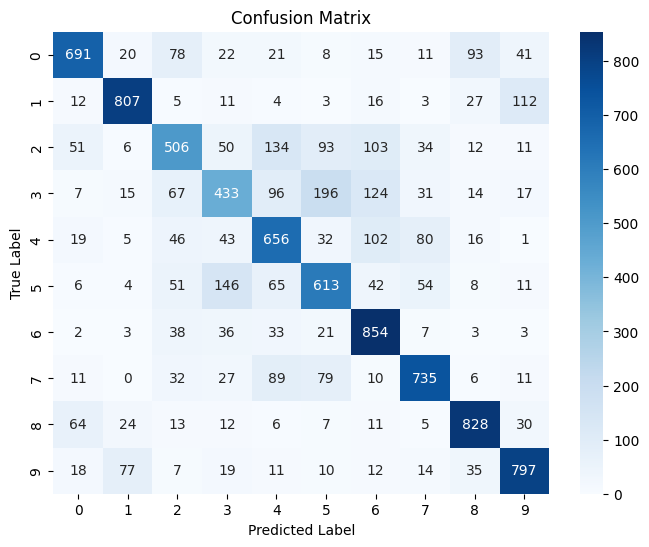

In [6]:
#Step 6: Generate Confusion Matrix
# Predict classes
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()